#### Setup

In [180]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
from pyvista import Plotter as Pl

# My `numpy` API

In [146]:
def np2sg(arr, extent=None):
    nx, ny = arr.shape
    if extent is None:
        x1, x2, y1, y2 = 0, nx-1, 0, ny-1
    else:
        [[x1, x2], [y1, y2]] = extent    
    dx, dy = (x2-x1)/(nx-1), (y2-y1)/(ny-1)
    x = np.arange(x1, x2+dx, dx)
    y = np.arange(y1, y2+dx, dy)
    xx, yy = np.meshgrid(x, y)
    return pv.StructuredGrid(xx, yy, arr)  
def np2ug(arr, extent=None, cell_data=True, order='F'):
    nx, ny, nz = arr.shape
    if extent is None:
        x1, x2, y1, y2, z1, z2 = 0, nx, 0, ny, 0, nz
    else:
        [[x1, x2], [y1, y2], [z1, z2]] = extent
    if cell_data:
        dx, dy, dz = (x2-x1)/nx, (y2-y1)/ny, (z2-z1)/nz
        origin = (x1-dx/2,y1-dy/2,z1-dz/2)
        dims = np.array(arr.shape) + 1
    else:
        dx, dy, dz = (x2-x1)/(nx-1), (y2-y1)/(ny-1), (z2-z1)/(nz-1)
        origin = (x1,y1,z1)
        dims = np.array(arr.shape)
    ug = pv.UniformGrid()
    ug.origin = origin
    ug.spacing = (dx,dy,dz) 
    ug.dimensions = dims
    if cell_data:
        ug.cell_data["values"] = arr.flatten(order=order)
    else:
        ug.point_data["values"] = arr.flatten(order=order)
    return ug

# Global theme

## Set

In [100]:
pv.set_plot_theme('document')
# pv.set_plot_theme('paraview')
# pv.set_plot_theme('dark')
# pv.set_plot_theme('default')

## List

In [18]:
pv.global_theme

Default Theme
-------------
Background               : [0.3, 0.3, 0.3]
Jupyter backend          : ipyvtklink
Full screen              : False
Window size              : [1024, 768]
Camera                   : {'position': [1, 1, 1], 'viewup': [0, 0, 1]}
Notebook                 : None
Font                     : 
    Family               : arial
    Size                 : 12
    Title size           : None
    Label size           : None
    Color                : [1, 1, 1]
    Float format         : None
Auto close               : True
Colormap                 : viridis
Color                    : (1.0, 1.0, 1.0)
NaN color                : (0.6627450980392157, 0.6627450980392157, 0.6627450980392157)
Edge color               : (0.0, 0.0, 0.0)
Outline color            : (1.0, 1.0, 1.0)
Floor color              : (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
Colorbar orientation     : horizontal
Colorbar - horizontal    : 
    Width                : 0.6
    Height            

In [13]:
pv.global_theme.jupyter_backend

'ipyvtklink'

In [43]:
dir(pv.global_theme)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_antialiasing',
 '_auto_close',
 '_axes',
 '_background',
 '_camera',
 '_cmap',
 '_color',
 '_colorbar_horizontal',
 '_colorbar_orientation',
 '_colorbar_vertical',
 '_depth_peeling',
 '_edge_color',
 '_floor_color',
 '_font',
 '_full_screen',
 '_hidden_line_removal',
 '_interactive',
 '_jupyter_backend',
 '_lighting',
 '_multi_rendering_splitting_position',
 '_multi_samples',
 '_name',
 '_nan_color',
 '_notebook',
 '_outline_color',
 '_render_points_as_spheres',
 '_return_cpos',
 '_show_edges',
 '_show_scalar_bar',
 '_silhouette',
 '_slider_styles',
 '_smooth_shading',
 '_title',
 '_

In [47]:
dir(pv.global_theme.axes)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_box',
 '_show',
 '_x_color',
 '_y_color',
 '_z_color',
 'box',
 'from_dict',
 'show',
 'to_dict',
 'x_color',
 'y_color',
 'z_color']

## Modify

In [124]:
gt = pv.global_theme
gt.window_size = [700, 500]
gt.show_edges = 0
gt.return_cpos = 1
gt.jupyter_backend = 'none' # 'panel', #'ipygany', #'pythreejs'

This will revert to defaults on kernel restart. Or upon:

In [17]:
pv.global_theme.restore_defaults()

# Plotter

In [10]:
help(pv.Plotter)

Help on class Plotter in module pyvista.plotting.plotting:

class Plotter(BasePlotter)
 |  Plotter(off_screen=None, notebook=None, shape=(1, 1), groups=None, row_weights=None, col_weights=None, border=None, border_color='k', border_width=2.0, window_size=None, multi_samples=None, line_smoothing=False, point_smoothing=False, polygon_smoothing=False, splitting_position=None, title=None, lighting='light kit', theme=None)
 |  
 |  Plotting object to display vtk meshes or numpy arrays.
 |  
 |  Parameters
 |  ----------
 |  off_screen : bool, optional
 |      Renders off screen when ``True``.  Useful for automated
 |      screenshots.
 |  
 |  notebook : bool, optional
 |      When ``True``, the resulting plot is placed inline a jupyter
 |      notebook.  Assumes a jupyter console is active.  Automatically
 |      enables ``off_screen``.
 |  
 |  shape : list or tuple, optional
 |      Number of sub-render windows inside of the main window.
 |      Specify two across with ``shape=(2, 1)`` a

In [135]:
help(pv.Plotter.set_viewup)

Help on function set_viewup in module pyvista.plotting.renderer:

set_viewup(self, vector)
    Set camera viewup vector.
    
    Parameters
    ----------
    vector : sequence
        New 3 value camera viewup vector.
    
    Examples
    --------
    Look from the top down by setting view up to ``[0, 1, 0]``.
    Notice how the Y axis appears vertical.
    
    >>> from pyvista import demos
    >>> pl = demos.orientation_plotter()
    >>> pl.set_viewup([0, 1, 0])
    >>> pl.show()



# Camera view

In [ ]:
pl.view_yx()

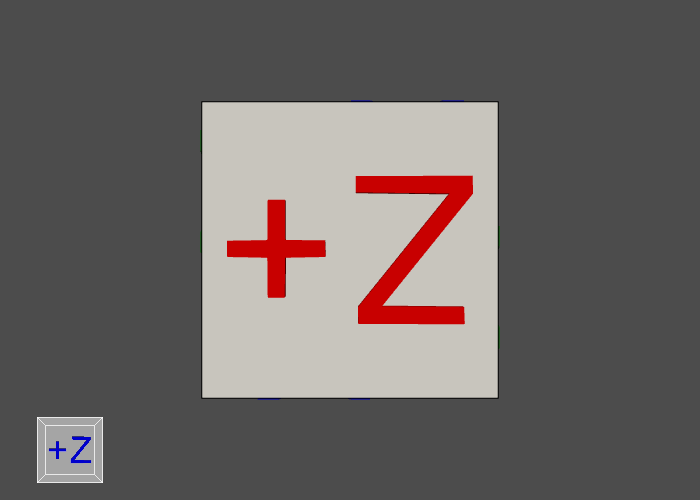

In [140]:
from pyvista import demos
pl = demos.orientation_plotter()
pl.set_viewup([.5,0,0])
pl.show()

# Structured grid

Surfaces?

In [89]:
sg = pv.StructuredGrid()
help(sg)

Help on StructuredGrid in module pyvista.core.pointset object:

class StructuredGrid(vtkmodules.vtkCommonDataModel.vtkStructuredGrid, PointGrid, pyvista.core.filters.structured_grid.StructuredGridFilters)
 |  StructuredGrid(*args, **kwargs) -> None
 |  
 |  Dataset used for topologically regular arrays of data.
 |  
 |  Can be initialized in one of the following several ways:
 |  
 |  - Create empty grid
 |  - Initialize from a vtk.vtkStructuredGrid object
 |  - Initialize directly from the point arrays
 |  
 |  See _from_arrays in the documentation for more details on initializing
 |  from point arrays
 |  
 |  Examples
 |  --------
 |  >>> import pyvista
 |  >>> import vtk
 |  >>> import numpy as np
 |  
 |  Create empty grid
 |  
 |  >>> grid = pyvista.StructuredGrid()
 |  
 |  Initialize from a vtk.vtkStructuredGrid object
 |  
 |  >>> vtkgrid = vtk.vtkStructuredGrid()
 |  >>> grid = pyvista.StructuredGrid(vtkgrid)
 |  
 |  Create from NumPy arrays
 |  
 |  >>> xrng = np.arange(-10

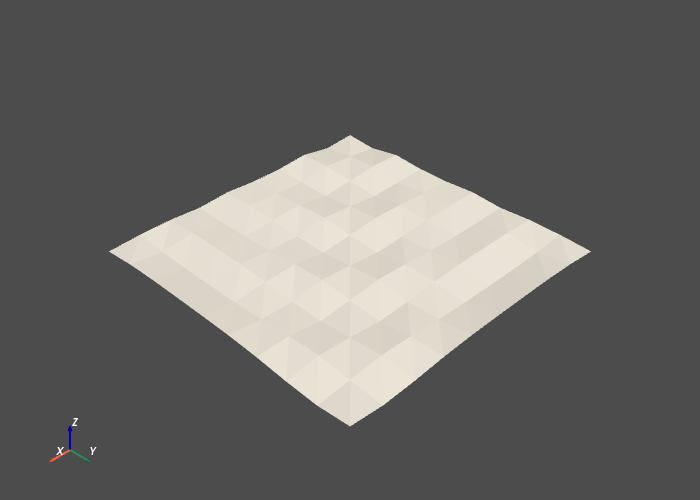

CPU times: user 168 ms, sys: 8 ms, total: 176 ms
Wall time: 175 ms


In [55]:
%%time 
x1, y1, z1 = np.ones(3) * 100
x2, y2, z2 = np.ones(3) * 200
x = np.linspace(x1, x2, 10)
y = np.linspace(y1, y2, 10)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2+y**2)) * (z1 + (z2-z1)/2) / 100
sg = pv.StructuredGrid(x, y, z)
sg.plot()

# Uniform grid

Volumes?

In [88]:
ug = pv.UniformGrid()
help(ug)

Help on UniformGrid in module pyvista.core.grid object:

class UniformGrid(vtkmodules.vtkCommonDataModel.vtkImageData, Grid, pyvista.core.filters.uniform_grid.UniformGridFilters)
 |  UniformGrid(*args, **kwargs)
 |  
 |  Models datasets with uniform spacing in the three coordinate directions.
 |  
 |  Can be initialized in several ways:
 |  
 |  - Create empty grid
 |  - Initialize from a vtk.vtkImageData object
 |  - Initialize directly from the point arrays
 |  
 |  See ``_from_specs`` in the documentation for more details on initializing
 |  from point arrays
 |  
 |  Examples
 |  --------
 |  >>> import pyvista
 |  >>> import vtk
 |  >>> import numpy as np
 |  
 |  >>> # Create empty grid
 |  >>> grid = pyvista.UniformGrid()
 |  
 |  >>> # Initialize from a vtk.vtkImageData object
 |  >>> vtkgrid = vtk.vtkImageData()
 |  >>> grid = pyvista.UniformGrid(vtkgrid)
 |  
 |  >>> # Using just the grid dimensions
 |  >>> dims = (10, 10, 10)
 |  >>> grid = pyvista.UniformGrid(dims)
 |  
 | 

In [101]:
help(ug.plot)

Help on method plot in module pyvista.plotting.helpers:

plot(off_screen=None, full_screen=None, screenshot=None, interactive=True, cpos=None, window_size=None, show_bounds=False, show_axes=None, notebook=None, background=None, text='', return_img=False, eye_dome_lighting=False, volume=False, parallel_projection=False, use_ipyvtk=None, jupyter_backend=None, return_viewer=False, return_cpos=False, jupyter_kwargs={}, theme=None, hidden_line_removal=None, anti_aliasing=None, zoom=None, **kwargs) method of pyvista.core.grid.UniformGrid instance
    Plot a vtk or numpy object.
    
    Parameters
    ----------
    var_item : pyvista.DataSet, vtk, or numpy object
        VTK object or ``numpy`` array to be plotted.
    
    off_screen : bool, optional
        Plots off screen when ``True``.  Helpful for saving
        screenshots without a window popping up.  Defaults to the
        global setting ``pyvista.OFF_SCREEN``.
    
    full_screen : bool, optional
        Opens window in full scr

In [260]:
%%time 
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,n+1) # set z at last index of x and y

ug = pv.UniformGrid()
x1, y1, z1 = np.zeros(3)
x2, y2, z2 = np.ones(3) * 6
dx, dy, dz = (x2-x1)/(nx), (y2-y1)/(ny), (z2-z1)/(nz) # if cells, if points, use (nx-1) etc/
print(dx,dy,dz)
ug.origin = (x1,y1,z1)  # The bottom left corner of the data set
ug.spacing = (dx,dy,dz)  # These are the cell sizes along each axis
ug.dimensions = np.array(v.shape) + 1 # +1 because these are nodes v will be assigned to cells 
ug.cell_data["values"] = v.flatten(order="F") 
# ug.dimensions = np.array(v.shape)
# ug.point_data["values"] = v.flatten(order="F") 

1.5 1.5 1.5
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 7.68 ms


In [261]:
ug

UniformGrid (0x7f9564a16fa0)
  N Cells:	64
  N Points:	125
  X Bounds:	0.000e+00, 6.000e+00
  Y Bounds:	0.000e+00, 6.000e+00
  Z Bounds:	0.000e+00, 6.000e+00
  Dimensions:	5, 5, 5
  Spacing:	1.500e+00, 1.500e+00, 1.500e+00
  N Arrays:	1

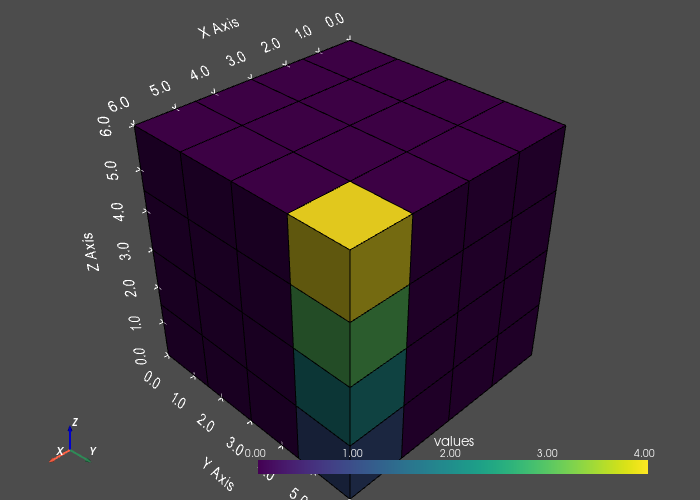

In [33]:
ug.plot(show_edges=1, show_grid=1, show_axes=1)

## Cells vs. nodes

In [25]:
%%time 
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,n+1) # set z at last index of x and y

ug = pv.UniformGrid()
x1, y1, z1 = np.zeros(3)
x2, y2, z2 = np.ones(3) * 6
dx, dy, dz = (x2-x1)/(nx-1), (y2-y1)/(ny-1), (z2-z1)/(nz-1)
ug.origin = (x1,y1,z1)  # The bottom left corner of the data set
ug.spacing = (dx,dy,dz)  # These are the cell sizes along each axis
# ug.dimensions = np.array(v.shape) + 1 # +1 because these are nodes v will be assigned to cells 
# ug.cell_data["values"] = v.flatten(order="F") 
ug.dimensions = np.array(v.shape)
ug.point_data["values"] = v.flatten(order="F") 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 913 µs


This is a right-hand coordinate system, same as used 'at school'. In seismology we usually use left-hand one, with Z axis pointing down.

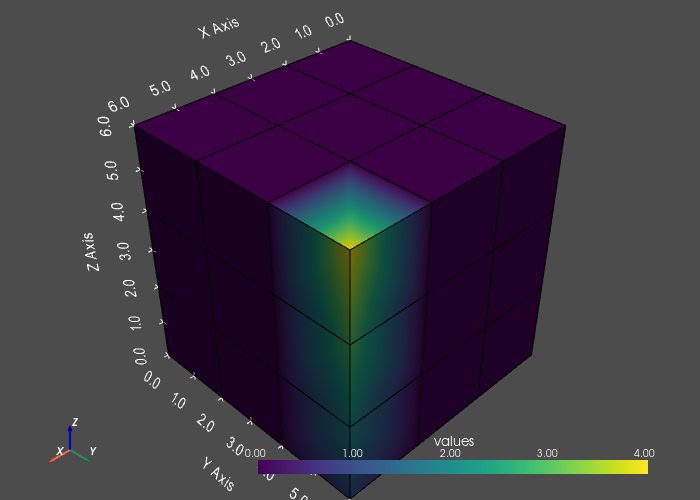

In [26]:
ug.plot(show_edges=1, show_grid=1, show_axes=1)

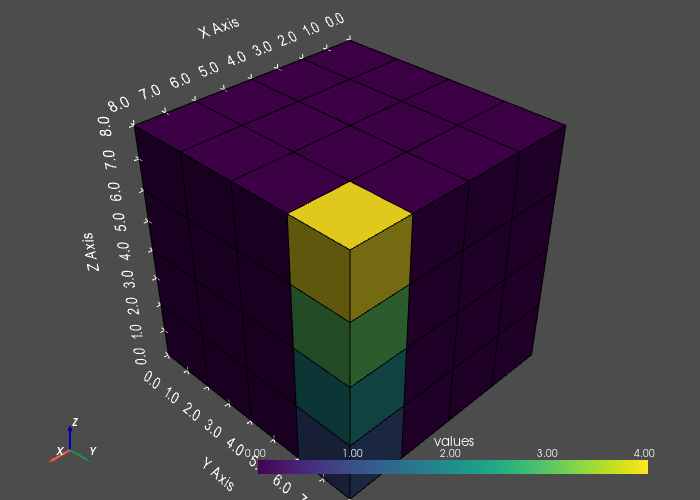

In [22]:
ug.plot(show_edges=1, show_grid=1, show_axes=1)

## Orientation

In [164]:
# p = pv.Plotter()
# p.show_axes()
# p.show_grid()
# p.add_mesh(ug)
# p.view_yx() # note
# p.show()

In [162]:
# help(p.show)

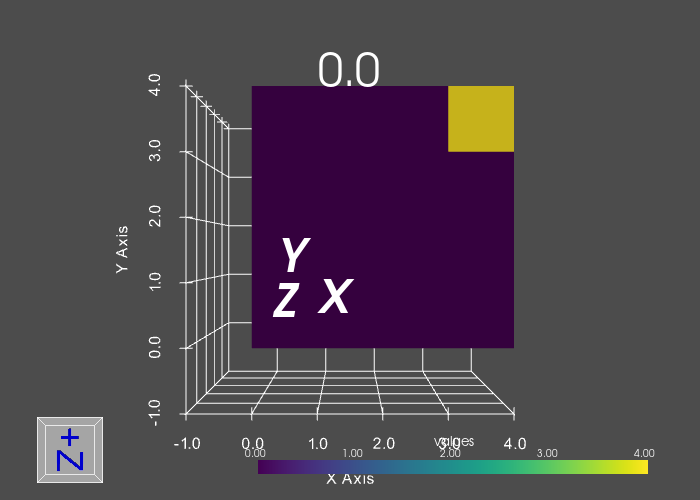

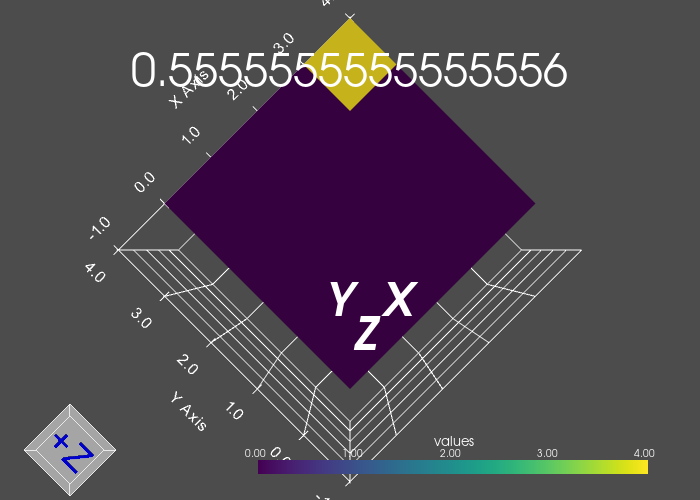

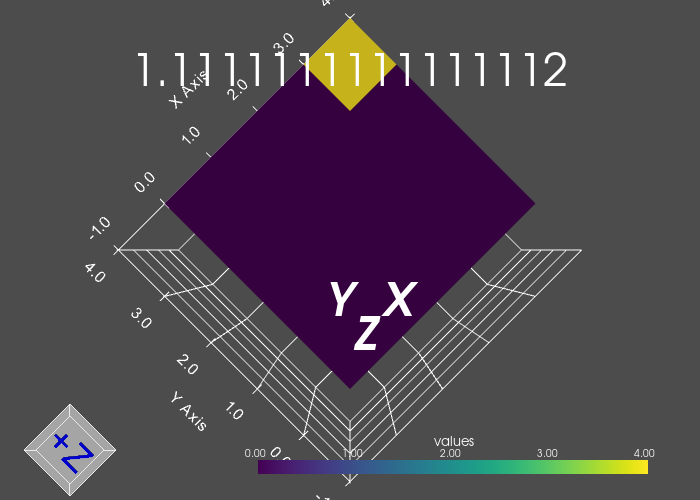

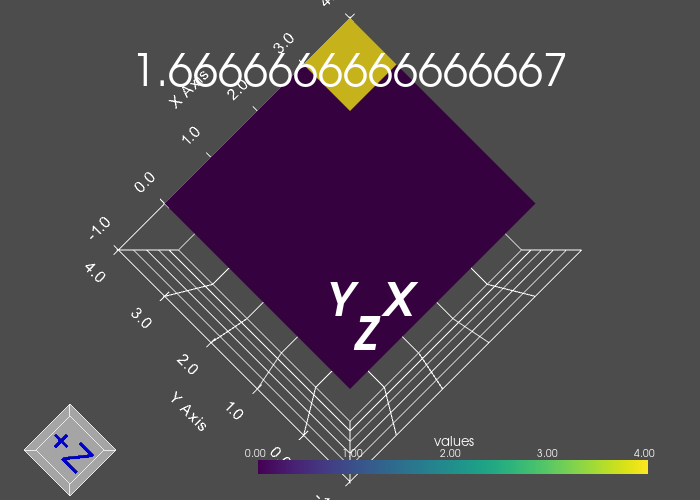

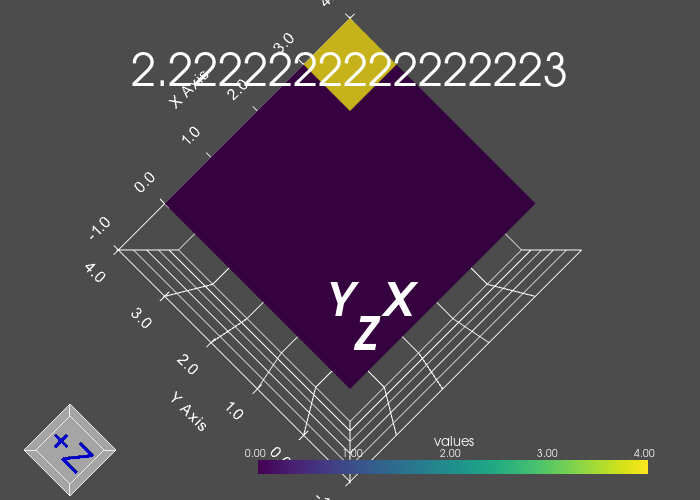

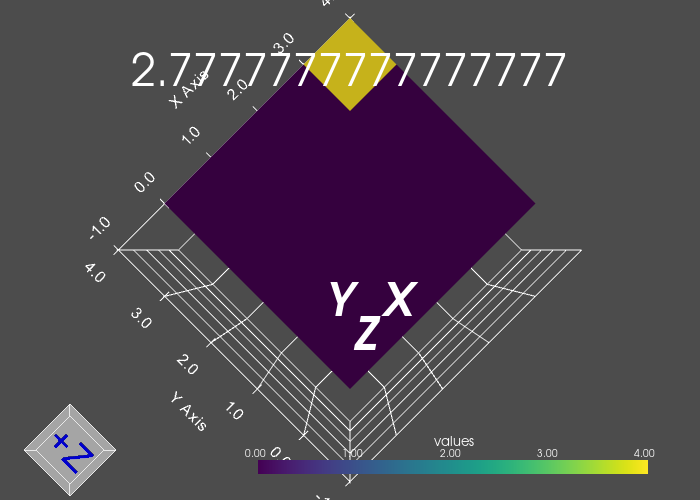

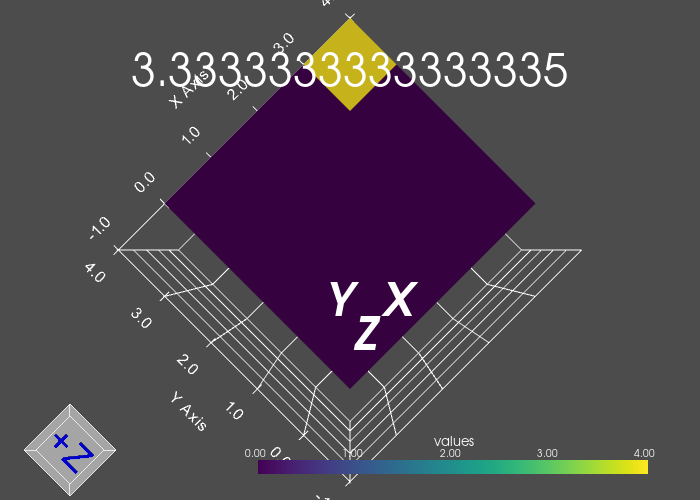

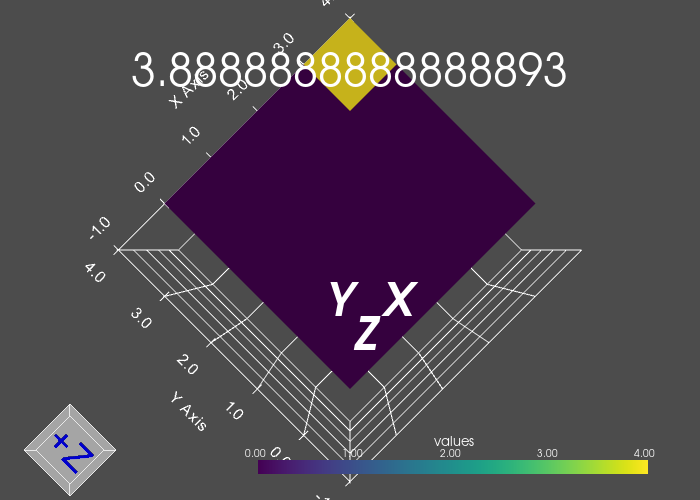

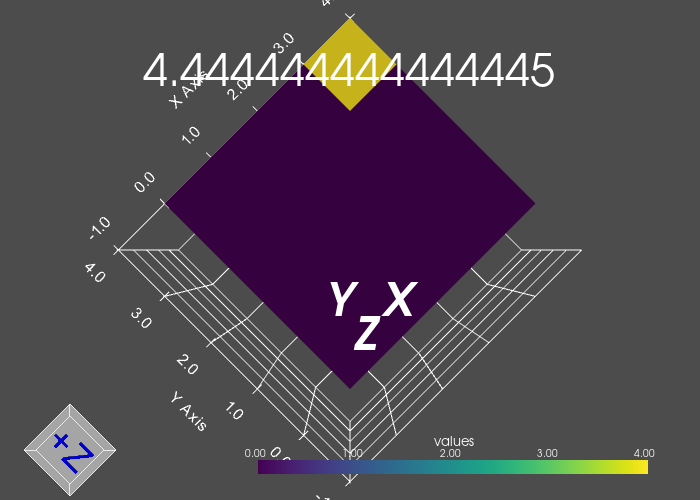

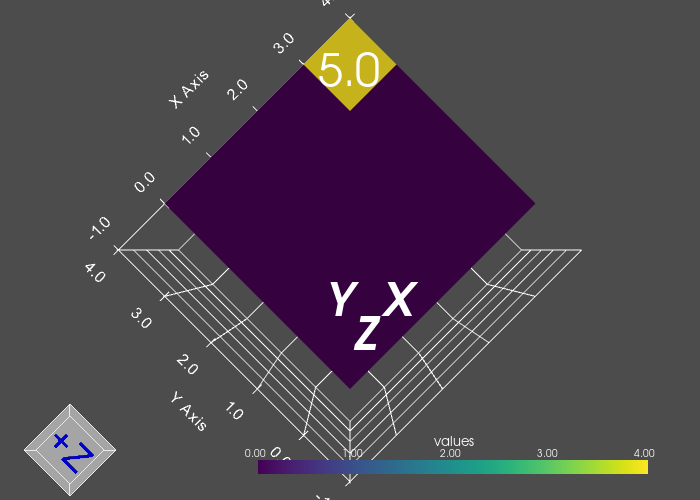

In [174]:
for i in np.linspace(0,5,10):
#     cpos = ug.plot(show_edges=True, show_bounds=1, return_cpos=1, cpos=[i,1,1], text=str(i))
    p = pv.Plotter()
    p.show_axes()
    p.add_axes_at_origin()
#  'add_background_image',
#     p.add_bounding_box()
    p.show_grid()
    p.add_mesh(ug)
    p.set_viewup([i,i,-i])
#     p.view_yx()
    p.add_title(str(i))
    p.show()
    

In [168]:
dir(p)

['_BasePlotter__before_close_callback',
 '_Plotter__prior_window_size',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_before_close_callback',
 '_check_has_ren_win',
 '_check_rendered',
 '_clear_ren_win',
 '_closed',
 '_first_time',
 '_has_background_layer',
 '_id_name',
 '_image_depth_null',
 '_labels',
 '_on_first_render_request',
 '_prep_for_close',
 '_rendered',
 '_run_image_filter',
 '_save_image',
 '_scalar_bar_slot_lookup',
 '_scalar_bar_slots',
 '_scalar_bars',
 '_store_image',
 '_theme',
 '_window_size_unset',
 'add_actor',
 'add_arrows',
 'add_axes',
 'add_axes_at_origin',
 'add_background_image',
 'add_bounding_box',
 'add_box_widget',
 'add_c

# Both grids

In [45]:
%%time 
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,n+1) # set z at last index of x and y

ug = pv.UniformGrid()
x1, y1, z1 = np.ones(3) * 100
x2, y2, z2 = np.ones(3) * 200
dx, dy, dz = (x2-x1)/(nx), (y2-y1)/(ny), (z2-z1)/(nz) # if cells, if points, use (nx-1) etc/
print(x1,x2,y1,y2,z1,z2)
print(dx,dy,dz)
ug.origin = (x1,y1,z1)  # The bottom left corner of the data set
ug.spacing = (dx,dy,dz)  # These are the cell sizes along each axis
ug.dimensions = np.array(v.shape) + 1 # +1 because these are nodes v will be assigned to cells 
ug.cell_data["values"] = v.flatten(order="F") 
# ug.dimensions = np.array(v.shape)
# ug.point_data["values"] = v.flatten(order="F") 

100.0 200.0 100.0 200.0 100.0 200.0
25.0 25.0 25.0
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.72 ms


In [48]:
%%time 
x = np.linspace(x1, x2, 10)
y = np.linspace(y1, y2, 10)
x, y = np.meshgrid(x, y)
z = np.ones(x.shape) * (z1 + (z2-z1)/2)
# Create and structured surface
sg = pv.StructuredGrid(x, y, z)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 906 µs


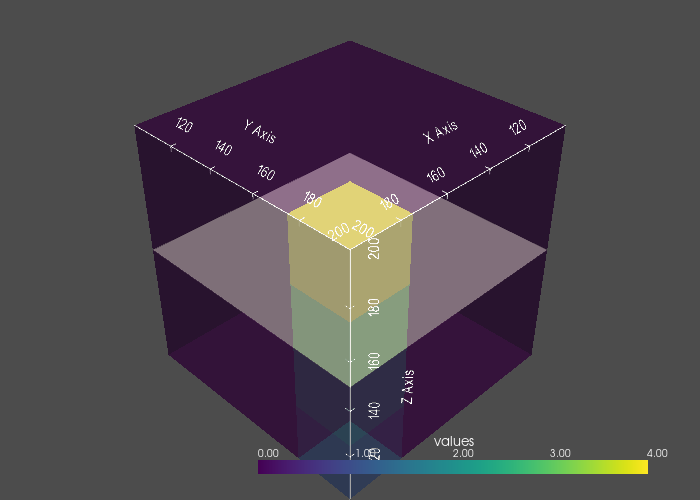

In [49]:
p = pv.Plotter(notebook=1, off_screen=1)
p.add_mesh(ug, opacity=.5)
p.add_mesh(sg, smooth_shading=1, interpolate_before_map=0,
#           scalars=z.ravel(),
          )
# p.add_title('My title')
p.show_grid()
p.show_bounds()
p.show(
#     interactive_update=1
)

# Clipping

In [162]:
help(ug.clip)

Help on method clip in module pyvista.core.filters.data_set:

clip(normal='x', origin=None, invert=True, value=0.0, inplace=False, return_clipped=False, progress_bar=False) method of pyvista.core.grid.UniformGrid instance
    Clip a dataset by a plane by specifying the origin and normal.
    
    If no parameters are given the clip will occur in the center
    of that dataset.
    
    Parameters
    ----------
    normal : tuple(float) or str
        Length 3 tuple for the normal vector direction. Can also
        be specified as a string conventional direction such as
        ``'x'`` for ``(1,0,0)`` or ``'-x'`` for ``(-1,0,0)``, etc.
    
    origin : tuple(float), optional
        The center ``(x,y,z)`` coordinate of the plane on which the clip
        occurs. The default is the center of the dataset.
    
    invert : bool, optional
        Flag on whether to flip/invert the clip.
    
    value : float, optional
        Set the clipping value along the normal direction.
        Th

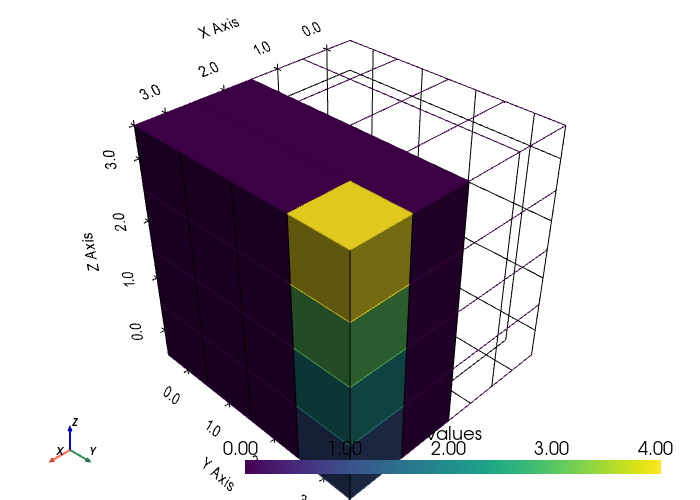

In [166]:
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
ug = np2ug(v)
p = pv.Plotter()
p.add_mesh(ug, style='wireframe')
p.add_mesh(ug.clip(normal=(1,0,0), invert=False), 
#            origin=(0,0,0),
          )
p.show_axes()
p.show_grid()
p.show()

# Opacity

In [188]:
opacity.flatten(order='F')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [187]:
# help(p.add_mesh)

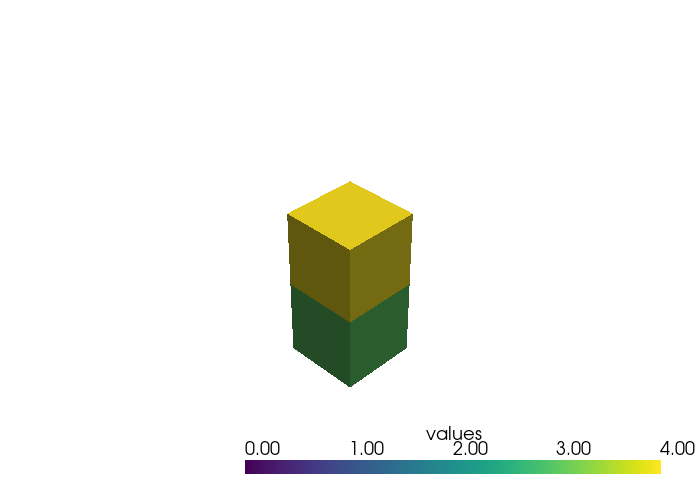

In [228]:
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
ug = np2ug(v)
p = Pl()
opacity = (v>2).astype(int)
p.add_mesh(ug, opacity=opacity.flatten(order='F'))
p.show()

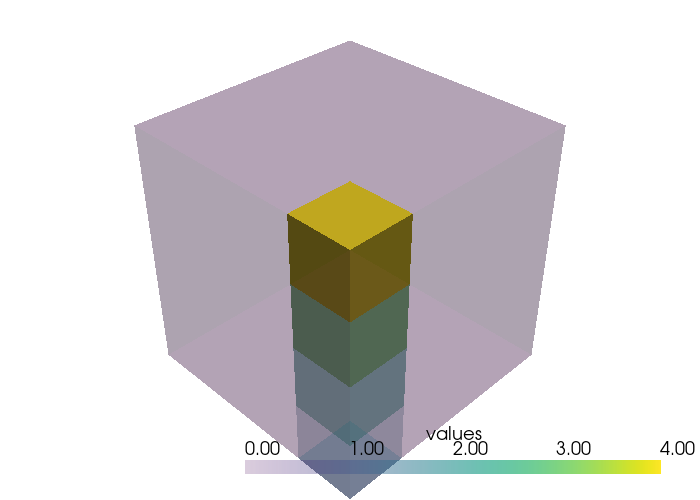

In [231]:
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
ug = np2ug(v)
p = Pl()
p.add_mesh(ug, opacity=[0.2, 1])
p.show()

# Bathymetry

In [149]:
# data 
fname = '../../data/bt_x8000_18000_y4000_14000_shape201x201.mmp'
bt = np.memmap(fname, dtype=np.float32, shape=(201,201))
sg = np2sg(-bt, extent=[[8e3, 18e3], [4e3, 14e3]])

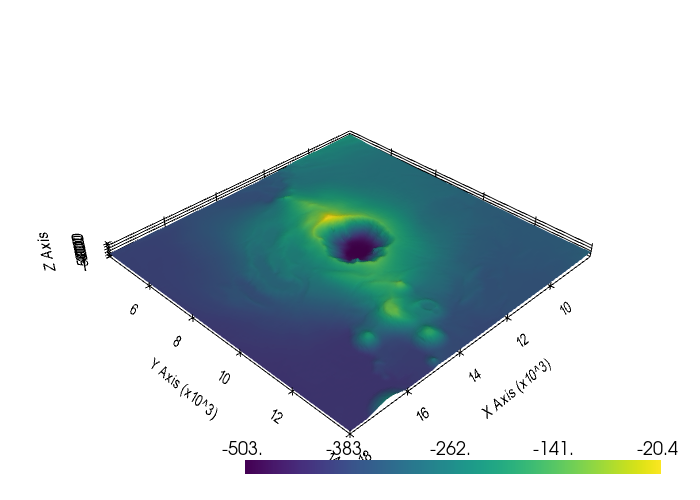

In [150]:
# plot 
p = pv.Plotter(off_screen=True)
p.add_mesh(sg, scalars=sg.points[:,2])
p.show_grid()
p.show()

# Vp model

In [198]:
!ls ../../data

bt_kol01_shape341x361.mmp
bt_x8000_18000_y4000_14000_shape201x201.mmp
p14-CP00010-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
p14-CP00020-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
p14-CP00040-Vp_shape341x361x81.mmp
p14-CP00080-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
p14-CP00080-Vp_shape341x361x81.mmp
p14-CP00160-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
p14-CP00160-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
p14-StartVp_shape341x361x81.mmp


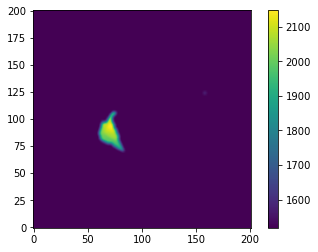

In [233]:
# data 
fname = '../../data/p14-CP00160-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp'
v = np.memmap(fname, dtype=np.float32, shape=(201,201,81))
x1, x2, y1, y2, z1, z2 = 8e3, 18e3, 4e3, 14e3, 0, -4e3
extent = [[x1, x2], [y1, y2], [z1, z2]]
plt.imshow(v[...,0].T)
plt.gca().invert_yaxis()
plt.colorbar()
ug = np2ug(v, extent)

In [221]:
op = (v>1550).astype(int)
op.shape

(201, 201, 81)

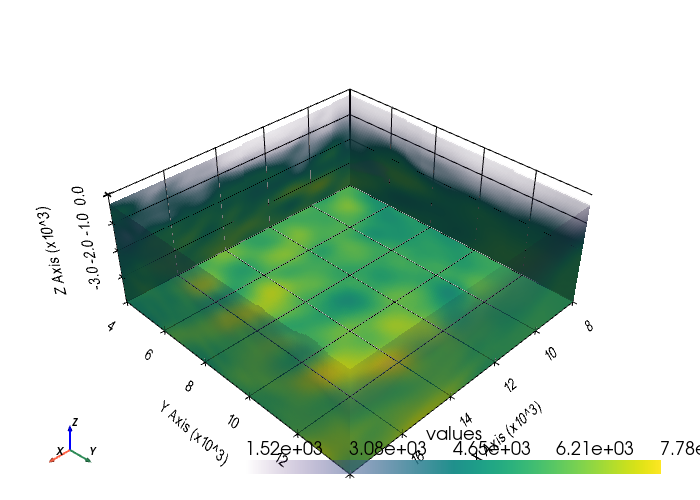

In [237]:
# plot,
p = pv.Plotter(off_screen=True)
p.add_mesh(ug, opacity=[0,1, 1]) #op.flatten('F'))
p.show_grid()
# p.view_zx()
p.show_axes()
p.show()

# Both

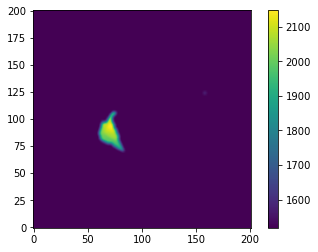

In [257]:
# data 
fname = '../../data/p14-CP00160-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp'
v = np.memmap(fname, dtype=np.float32, shape=(201,201,81))
x1, x2, y1, y2, z1, z2 = 8e3, 18e3, 4e3, 14e3, 0, -4e3
extent = [[x1, x2], [y1, y2], [z1, z2]]
plt.imshow(v[...,0].T)
plt.gca().invert_yaxis()
plt.colorbar()
ug = np2ug(v, extent)

In [259]:
sg

StructuredGrid (0x7f9564c80580)
  N Cells:	40000
  N Points:	40401
  X Bounds:	8.000e+03, 1.800e+04
  Y Bounds:	4.000e+03, 1.400e+04
  Z Bounds:	-5.035e+02, -2.036e+01
  Dimensions:	201, 201, 1
  N Arrays:	1

In [258]:
ug

UniformGrid (0x7f956444c3a0)
  N Cells:	3272481
  N Points:	3345928
  X Bounds:	7.975e+03, 1.798e+04
  Y Bounds:	3.975e+03, 1.398e+04
  Z Bounds:	-3.975e+03, 2.469e+01
  Dimensions:	202, 202, 82
  Spacing:	4.975e+01, 4.975e+01, -4.938e+01
  N Arrays:	1

In [256]:
# ug.add_field_array(scalars=np.zeros(((201,201,81))).flatten(), name='zeros')
# ug.add_field_data(scalars=np.zeros(((201,201,81))).flatten(), name='zeros')

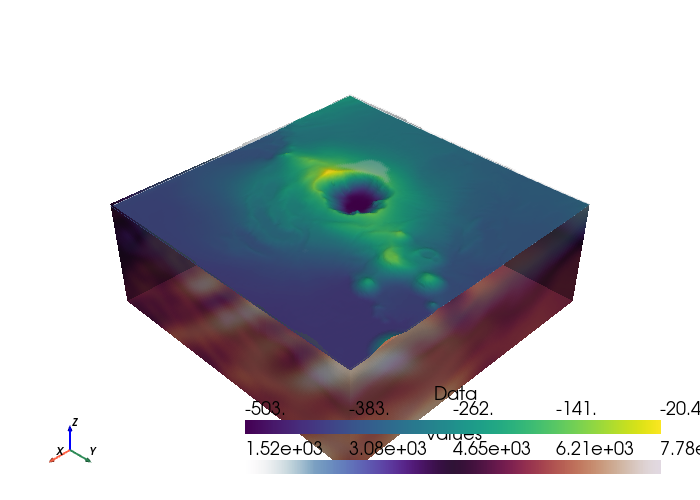

In [244]:
# plot 
p = pv.Plotter(off_screen=True)
p.add_mesh(ug, cmap='twilight', opacity=[0,1,1,1,1,1,1])
p.add_mesh(sg)
# p.show_grid()
# p.view_xy()
p.show_axes()
p.show()

In [121]:
clipped = ug.compute_implicit_distance(sg, inplace=True)

TypeError: SetInput argument 1: method requires a vtkPolyData, a vtkStructuredGrid was provided.

# ...